# QML 101

Quantum Machine Learning (QML) is an emerging and promising research area within quantum computing.

By harnessing quantum phenomena such as **superposition** and **entanglement**, QML enables efficient encoding and manipulation of data using multiple qubits. These unique capabilities offer the potential to significantly accelerate machine learning tasks and enhance model expressiveness, especially when working with high-dimensional classical datasets.

As the field continues to develop, QML is expected to play a key role in advancing both quantum and classical machine learning paradigms.

## Basics of Quantum Computing

### What is a Qubit?


At the heart of quantum computing lies the concept of the **quantum bit**, or **qubit**. Unlike a classical bit, which takes on a value of either `0` or `1`, a qubit can exist in a **superposition** of both states simultaneously. This property allows quantum computers to process information in fundamentally different and often more powerful ways than classical systems.

Mathematically, a qubit is described as a unit vector in a two-dimensional complex Hilbert space. Its general state can be written as:

$$
\vert \psi \rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle,
$$

where $\alpha, \beta \in \mathbb{C}$ and must satisfy the **normalization condition**:

$$
|\alpha|^2 + |\beta|^2 = 1.
$$

Here:
- $\vert 0 \rangle$ and $\vert 1 \rangle$ are the computational basis states,
- $\alpha$ and $\beta$ are complex probability amplitudes,
- and $\vert \psi \rangle$ is said to be in a **superposition** of $\vert 0 \rangle$ and $\vert 1 \rangle$.

When a measurement is performed in the computational basis, the qubit collapses to one of the basis states with probabilities:

$$
P(0) = |\alpha|^2, \quad P(1) = |\beta|^2.
$$

To conveniently calculate inner products and probabilities, we also define the **bra** (the Hermitian conjugate of a ket) as:

$$
\langle \psi \vert = \alpha^* \langle 0 \vert + \beta^* \langle 1 \vert,
$$

where $\alpha^*$ and $\beta^*$ are the complex conjugates of $\alpha$ and $\beta$. The inner product (or norm) of the state is then:

$$
\langle \psi \vert \psi \rangle = |\alpha|^2 + |\beta|^2 = 1,
$$

which confirms the normalization of the quantum state.

> This formalism is part of **Dirac notation**, a standard language for describing quantum states and operations.

### More Qubits

When working with multiple qubits, the state of the overall system is represented by the **tensor product** of the individual qubit states. For example, the state of a two-qubit system can be written as:

$$
\begin{align}
\vert \psi \rangle &= c_1 \vert 0 \rangle_1 \otimes \vert 0 \rangle_2 + c_2 \vert 0 \rangle_1 \otimes \vert 1 \rangle_2 \\
&\quad + c_3 \vert 1 \rangle_1 \otimes \vert 0 \rangle_2 + c_4 \vert 1 \rangle_1 \otimes \vert 1 \rangle_2 \\
&= c_1 \vert 00 \rangle + c_2 \vert 01 \rangle + c_3 \vert 10 \rangle + c_4 \vert 11 \rangle,
\end{align}
$$

where $c_1, c_2, c_3, c_4 \in \mathbb{C}$ are complex coefficients satisfying the normalization condition:

$$
|c_1|^2 + |c_2|^2 + |c_3|^2 + |c_4|^2 = 1.
$$

In many cases, a multi-qubit state can be **separated** into a product of individual single-qubit states:

$$
\vert \psi \rangle = \vert \psi_1 \rangle \otimes \vert \psi_2 \rangle 
= (\alpha_1 \vert 0 \rangle + \beta_1 \vert 1 \rangle) \otimes (\alpha_2 \vert 0 \rangle + \beta_2 \vert 1 \rangle).
$$

However, there exist special quantum states that **cannot** be written as a tensor product of single-qubit states. These are known as **entangled states**.

A well-known example is the **Bell state**:

$$
\vert \Phi^+ \rangle = \frac{1}{\sqrt{2}} (\vert 00 \rangle + \vert 11 \rangle),
$$

which is **entangled** because it cannot be decomposed into individual qubit states. In such cases, measuring one qubit instantaneously determines the outcome of the other, regardless of the physical distance between them—a phenomenon that lies at the heart of quantum nonlocality.

> Entanglement is a key resource in quantum computing and quantum communication protocols such as quantum teleportation and quantum key distribution.

### Quantum Gates and Circuits

Quantum gates are the fundamental operations applied to qubits. They are the quantum analogue of classical logic gates and operate through **unitary transformations**, which preserve the norm of the quantum state.

A unitary matrix $U$ satisfies $U^\dagger U = I$, where $U^\dagger$ is the conjugate transpose of $U$, and $I$ is the identity matrix. Quantum gates can act on one or more qubits at a time.

---

#### Common Single-Qubit Gates

These gates act on a single qubit and are represented by $2 \times 2$ unitary matrices.

- **Pauli-X (NOT) Gate:**

$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}, \quad X\vert 0 \rangle = \vert 1 \rangle, \quad X\vert 1 \rangle = \vert 0 \rangle
$$

- **Pauli-Y Gate:**

$$
Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}, \quad Y\vert 0 \rangle = i \vert 1 \rangle, \quad Y\vert 1 \rangle = -i \vert 0 \rangle
$$

- **Pauli-Z Gate:**

$$
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}, \quad Z\vert 0 \rangle = \vert 0 \rangle, \quad Z\vert 1 \rangle = -\vert 1 \rangle
$$

- **Hadamard (H) Gate:**

$$
H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}, \quad H\vert 0 \rangle = \frac{\vert 0 \rangle + \vert 1 \rangle}{\sqrt{2}}, \quad H\vert 1 \rangle = \frac{\vert 0 \rangle - \vert 1 \rangle}{\sqrt{2}}
$$

- **Rotation Gates:**

  These gates perform continuous rotations around the Bloch sphere axes.

  $$
  \begin{aligned}
  R_x(\theta) &= \cos(\theta/2) I - i \sin(\theta/2) X = 
  \begin{bmatrix}
  \cos(\theta/2) & -i\sin(\theta/2) \\
  -i\sin(\theta/2) & \cos(\theta/2)
  \end{bmatrix} \\
  R_y(\theta) &= \cos(\theta/2) I - i \sin(\theta/2) Y \\
  R_z(\theta) &= 
  \begin{bmatrix}
  e^{-i\theta/2} & 0 \\
  0 & e^{i\theta/2}
  \end{bmatrix}
  \end{aligned}
  $$

---

#### Common Two-Qubit Gates

Two-qubit gates allow for interaction between qubits and are necessary for creating **entanglement**.

- **CNOT (CX) Gate:**

  A controlled-X gate: flips the target qubit if the control is $\vert 1 \rangle$.

  $$
  \text{CNOT} =
  \begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 0 & 1 \\
  0 & 0 & 1 & 0
  \end{bmatrix}
  $$

- **Controlled-Z (CZ) Gate:**

  Applies a $Z$ gate to the target qubit only when the control qubit is $\vert 1 \rangle$.

  $$
  \text{CZ} =
  \begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 1 & 0 \\
  0 & 0 & 0 & -1
  \end{bmatrix}
  $$

- **SWAP Gate:**

  Swaps the states of two qubits.

  $$
  \text{SWAP} =
  \begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & 0 & 1 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 0 & 1
  \end{bmatrix}
  $$

- **Controlled Phase Gate (CPHASE):**

  Applies a phase shift to the target qubit if the control is $\vert 1 \rangle$.

  $$
  \text{CPHASE}(\phi) =
  \begin{bmatrix}
  1 & 0 & 0 & 0 \\
  0 & 1 & 0 & 0 \\
  0 & 0 & 1 & 0 \\
  0 & 0 & 0 & e^{i\phi}
  \end{bmatrix}
  $$

- **Toffoli Gate (CCX):**

  A 3-qubit gate. Flips the third (target) qubit if the first two (controls) are both $\vert 1 \rangle$.

  > This is a universal gate for classical logic and can implement NAND.

---

Quantum circuits are constructed by applying a sequence of quantum gates to an initial quantum state. Each line in a quantum circuit diagram represents a qubit, and each gate acts on one or more of those lines.

By combining gates, we can:
- Create superposition and entanglement,
- Implement quantum algorithms (e.g., Grover’s, Shor’s),
- Construct **parametrized quantum circuits** for variational quantum algorithms (VQAs) such as QVAF-based models.

> Quantum circuits form the foundation of all practical quantum algorithms and are programmable through frameworks like Qiskit, Pennylane, and Cirq.

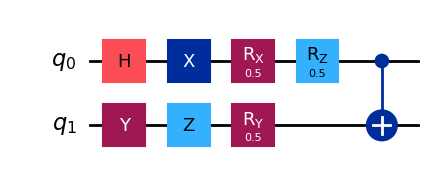

In [1]:
from qiskit import QuantumCircuit

# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply gates to qubit 0 and qubit 1
qc.h(0)           # Hadamard gate on qubit 0 (creates superposition)
qc.x(0)           # Pauli-X gate (bit-flip) on qubit 0
qc.y(1)           # Pauli-Y gate on qubit 1
qc.z(1)           # Pauli-Z gate on qubit 1
qc.rx(0.5, 0)     # RX rotation by 0.5 radians on qubit 0
qc.ry(0.5, 1)     # RY rotation by 0.5 radians on qubit 1
qc.rz(0.5, 0)     # RZ rotation by 0.5 radians on qubit 0

# Entangling gate: CNOT with control qubit 0 and target qubit 1
qc.cx(0, 1)

# Draw the circuit using matplotlib
qc.draw("mpl")

### Measurement

**Measurement** in quantum computing refers to the process of extracting classical information from a quantum state. Upon measurement, a qubit **collapses** to one of its basis states, with probabilities determined by its quantum amplitudes.

#### Measurement as an Observable

In quantum mechanics, measurements are associated with **Hermitian operators**, called **observables**. A Hermitian operator $M$ can be expressed in terms of its eigenvalues $\lambda_i$ and eigenvectors $\vert m_i \rangle$ as:

$$
M = \sum_i \lambda_i \vert m_i \rangle \langle m_i \vert.
$$

If a quantum system is in state $\vert \psi \rangle$, then the probability of obtaining the outcome $\lambda_i$ (i.e., observing the system in eigenstates $\vert m_i \rangle$) is:

$$
P(\lambda_i) = |\langle m_i \vert \psi \rangle|^2.
$$

#### Measurement as a Projection

To compute this probability, we often interpret measurement as a **projection** using the measurement operator $M_i = \vert m_i \rangle \langle m_i \vert$. Then:

$$
P(\lambda_i) = \langle \psi \vert M_i^\dagger M_i \vert \psi \rangle = \langle \psi \vert M_i \vert \psi \rangle = |\langle m_i \vert \psi \rangle|^2,
$$

where $M_i^\dagger = M_i$ because $M_i$ is Hermitian and $M_i^2 = M_i$ because it's a projector.

#### Measurement in the Computational Basis

In practice, quantum computers typically measure qubits in the **computational basis**, which corresponds to the eigenstates of the **Pauli-Z** operator:

- $\vert 0 \rangle$ with eigenvalue $+1$,
- $\vert 1 \rangle$ with eigenvalue $-1$.

Given a single-qubit state:

$$
\vert \psi \rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle,
$$

the expected value of the Pauli-Z measurement is:

$$
\langle Z \rangle = \langle \psi \vert Z \vert \psi \rangle = |\alpha|^2 - |\beta|^2.
$$

This expectation value is useful in variational quantum algorithms, where observables are evaluated to guide optimization.

> ⚠️ **Note:** Measurement irreversibly collapses the quantum state. Once measured, the quantum system is no longer in a superposition but in the observed basis state.

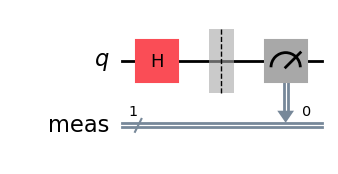

In [2]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw("mpl")

## Variational Quantum Algorithms (VQA)

Variational Quantum Algorithms (VQAs) are a class of **hybrid quantum-classical algorithms** that combine the power of quantum processors with classical optimization techniques. They have shown great promise for tackling optimization problems, quantum simulation, and machine learning tasks.

The core idea behind VQAs is to use a **parameterized quantum circuit** (also called an *ansatz*) to prepare quantum states, and iteratively optimize the circuit parameters using classical algorithms.

The typical workflow of a VQA involves the following steps:

1. **Data Encoding:**  
   Classical data is encoded into quantum states through specially designed quantum circuits. Efficient encoding is essential in quantum machine learning to represent complex classical data in a quantum system.

2. **Variational Circuit (Parameterized Unitaries):**  
   A quantum circuit composed of gates with adjustable parameters (e.g., rotation angles) is applied. This circuit transforms the initial quantum state into a parameter-dependent state that captures features of the data or the problem.

3. **Measurement:**  
   The quantum state is measured to extract classical information. Measurement outcomes are used to compute a **cost function** (or objective function), which quantifies how well the current parameters solve the problem.

4. **Classical Optimization:**  
   Classical optimization algorithms (such as gradient descent, COBYLA, or SPSA) update the circuit parameters to minimize or maximize the cost function. This feedback loop continues until convergence or a stopping criterion is met.

---

VQAs are flexible and can be tailored for various applications such as:

- **Quantum Approximate Optimization Algorithm (QAOA)** for combinatorial optimization  
- **Variational Quantum Eigensolver (VQE)** for estimating ground-state energies in chemistry  
- **Quantum Neural Networks** for machine learning

> The hybrid nature of VQAs makes them particularly suitable for near-term noisy quantum devices, leveraging classical computation to mitigate hardware limitations.

### Quantum Kernel Methods

**Quantum Kernel Methods** are quantum machine learning algorithms inspired by classical kernel methods such as Support Vector Machines (SVMs). They rely on the **quantum feature map** — a parameterized quantum circuit that embeds classical input data into a high-dimensional Hilbert space.

The key idea is to compute the **kernel function** between data points as the **inner product of quantum states**:

$$
k(x, x') = |\langle \phi(x) \vert \phi(x') \rangle|^2
$$

where $\vert \phi(x) \rangle$ is the quantum state that encodes the classical input $x$.

Quantum kernel methods offer potential **quantum advantage** by exploiting Hilbert spaces too large to simulate classically, enabling powerful nonlinear classification with linear algorithms.

---

#### Workflow of a Quantum Kernel Method

1. **Feature Map (Encoding Circuit):** Encode classical data $x$ into a quantum state $\vert \phi(x) \rangle$ using a quantum circuit.
2. **Compute Kernel Matrix:** For a dataset $\{x_i\}$, compute $k(x_i, x_j)$ using quantum overlaps between states.
3. **Classical Algorithm:** Use a classical kernel method (e.g., SVM) with the quantum kernel matrix for classification or regression.

![quantum kernel method](../fig/qkm.png)

### Data Re-Uploading Circuits

**Data re-uploading** is a strategy used in parameterized quantum circuits where the input data is encoded **multiple times** throughout the layers of a variational quantum circuit. This technique enhances the expressivity of quantum models and is especially useful in quantum neural networks (QNNs).

In contrast to basic quantum models that encode the data once at the beginning, **re-uploading** introduces classical input features at multiple points in the circuit. This allows the circuit to model more complex, nonlinear functions—similar to the depth and recurrence seen in classical neural networks.

---

#### Why Re-Upload Data?

Quantum circuits are often constrained in depth due to hardware noise and decoherence. Re-uploading helps:

- Compensate for shallow circuits by increasing expressivity.
- Introduce nonlinearity through the interplay of data and trainable parameters.
- Enable better generalization and function approximation in quantum models.

---

#### General Structure

A typical data re-uploading circuit follows this pattern:

1. Apply data-encoding gates (e.g., $R_x(x), R_y(x), R_z(x)$).
2. Apply trainable gates (e.g., $R_y(\theta), R_z(\theta)$).
3. Repeat steps 1 and 2 for multiple layers.

![data reuploading circuit](../fig/drc.png)

###### Further Reading

To go further in our work, it suffices to understand that **data re-uploading circuits** enhance the expressivity of quantum models by repeatedly encoding classical inputs throughout the layers of a variational quantum circuit. This mechanism is fundamental to our design of **Quantum Variational Activation Functions (QVAFs)**, such as **DARUAN**, and underpins the architecture of **Quantum-inspired Kolmogorov–Arnold Networks (QKANs)**.

If you're interested in deepening your understanding of the theory and techniques that underpin our approach, we recommend the following resources:

- *Quantum Computation and Quantum Information*  
  — Michael A. Nielsen and Isaac L. Chuang  
  *(The definitive textbook on quantum computing theory.)*

- [Quantum Machine Learning Tutorial](https://qml-tutorial.github.io)  
  — Yuxuan Du et al.

- [Quantum Models as Fourier Series](https://pennylane.ai/qml/demos/tutorial_expressivity_fourier_series)  
  — Maria Schuld and Johannes Jakob Meyer  
  *(A visual and mathematical demonstration of how data re-uploading circuits approximate functions via Fourier expansions.)*